<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Assignment 9: CONVOLUTIONAL NEURAL NETWORK</b></h1>


**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

#Build model: Mini Resnet

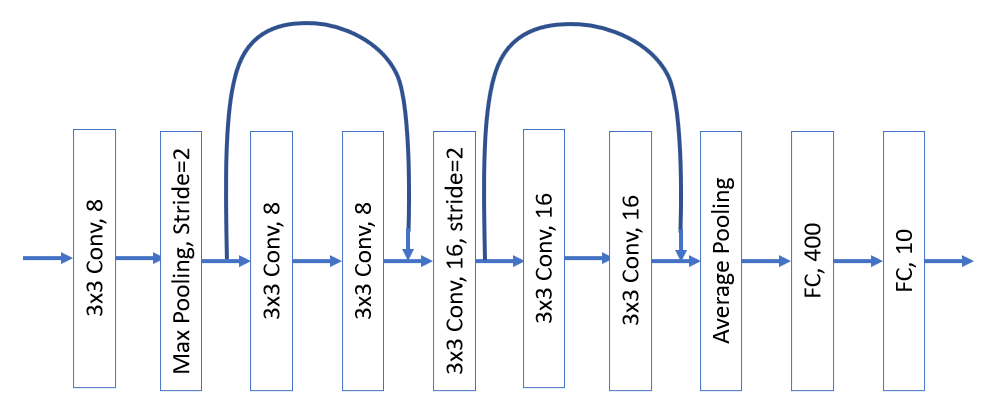

In [1]:
import tensorflow as tf 
from tensorflow import keras

from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, Add, AvgPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer

In [2]:
def build_MiniResnet(input_shape, classes):
    input = Input(shape=input_shape)
    C1 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (input)
    P1 = MaxPool2D(strides=2) (C1)

    C2 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (P1)
    C3 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (C2)

    add1 = Add () ([P1, C3])
    C4 = Conv2D(kernel_size=(3,3), filters=16, strides=(2, 2), activation='relu', padding='same') (add1)
    C5 = Conv2D(kernel_size=(3,3), filters=16, activation='relu', padding='same') (C4)
    C6 = Conv2D(kernel_size=(3,3), filters=16, activation='relu', padding='same') (C5)
    
    add2 = Add()([C4, C6])
    P2 = AvgPool2D()(add2)
    F1 = Flatten()(P2)

    D1 = Dense (400, activation='relu')(F1)
    output = Dense(classes, activation='softmax') (D1)
    model = Model(input, output)
    return model

In [3]:
model_MiniResnet = build_MiniResnet((28, 28, 1), 10)

In [4]:
model_MiniResnet.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(lr=1e-4),
        metrics=['accuracy']
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


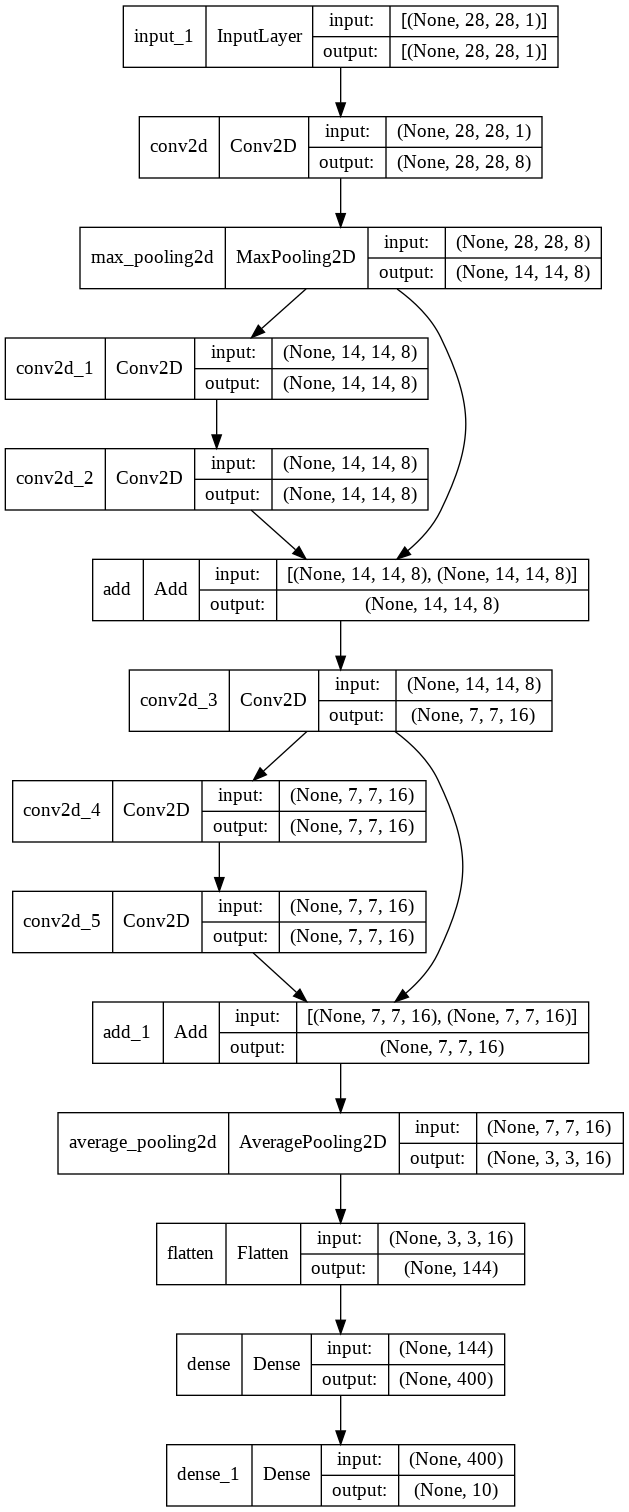

In [5]:
keras.utils.plot_model(model_MiniResnet, "ResNet.png", show_shapes=True)

In [6]:
stop_patience = 10
callbacks = [
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1,restore_best_weights=True),
]

# Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print(X_train[0].shape)

(28, 28, 1)


# Training

In [11]:
batch_size=32
epochs=100
with tf.device('/device:GPU:0'):
  history = model_MiniResnet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callbacks, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 24s 5ms/step - loss: 0.6597 - accuracy: 0.7996 - val_loss: 0.2863 - val_accuracy: 0.9057
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2502 - accuracy: 0.9204 - val_loss: 0.1951 - val_accuracy: 0.9346
Epoch 3/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1770 - accuracy: 0.9441 - val_loss: 0.1435 - val_accuracy: 0.9562
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1391 - accuracy: 0.9571 - val_loss: 0.1616 - val_accuracy: 0.9458
Epoch 5/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1165 - accuracy: 0.9633 - val_loss: 0.1204 - val_accuracy: 0.9637
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1018 - accuracy: 0.9676 - val_loss: 0.1027 - val_accuracy: 0.9683
Epoch 7/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.9723 - val_loss: 0.0924 - val_a

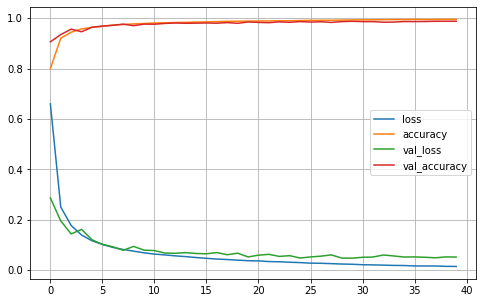

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## Evaluation

In [13]:
X_test = X_test/255

In [15]:
loss_test,accuracy_test=model_MiniResnet.evaluate(X_test, y_test)
print("Accuracy on test set: ",accuracy_test)
print("Loss on test set: ",loss_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9899
Accuracy on test set:  0.9898999929428101
Loss on test set:  0.03462018445134163


In [17]:
prediction = model_MiniResnet.predict(X_test)
y_pred = [np.argmax(prediction[i]) for i in range(len(X_test))]
pred=prediction

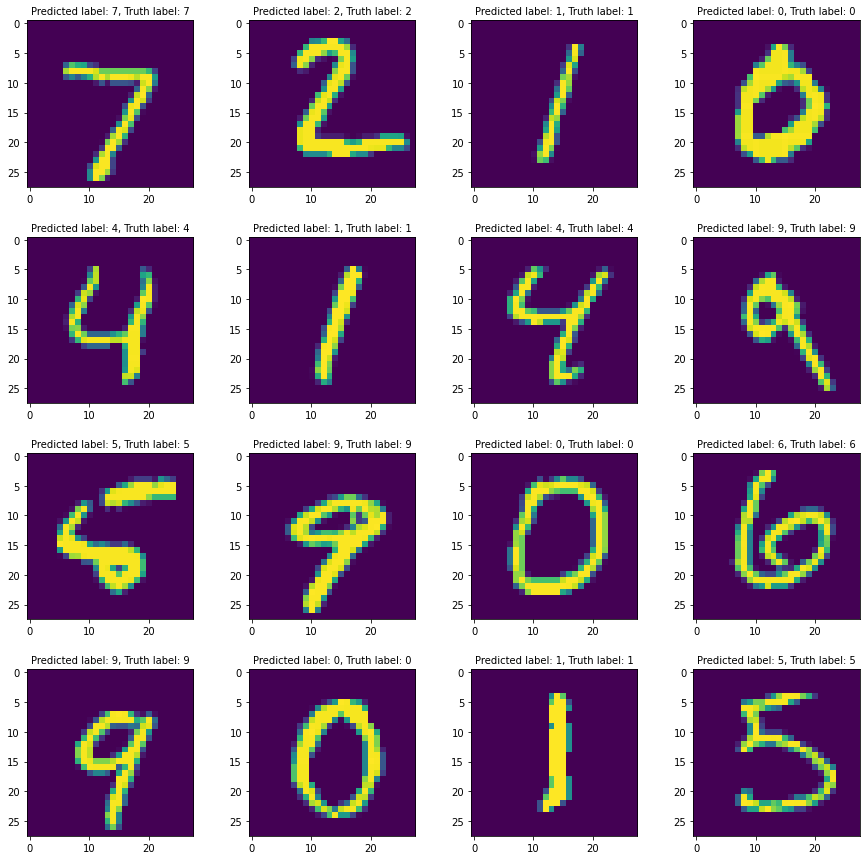

In [18]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    label_pred = "Predicted label: " + str(np.argmax(pred[i])) + ", Truth label: " + str(y_test[i])
    plt.title(label_pred, fontsize=10)
    plt.imshow(X_test[i])

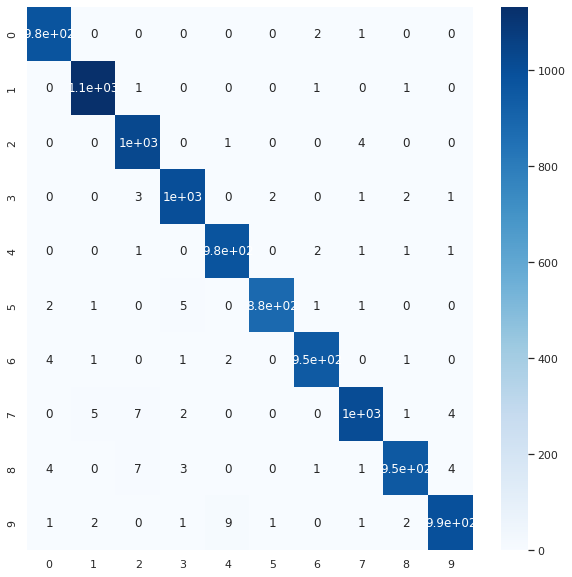

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = [_ for _ in range(10)]
confusion_matrix = confusion_matrix(y_test, y_pred, labels)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')